# Content-based Recommendation System

## Exploratory data analysis - XWines

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
ratings_path = r"C:\Users\diele\OneDrive\Área de Trabalho\Recomendação Inteligente\Base de dados\XWines_Slim_1K_wines_150K_ratings\XWines_Slim_150K_ratings.csv"
wines_path = r"C:\Users\diele\OneDrive\Área de Trabalho\Recomendação Inteligente\Base de dados\XWines_Slim_1K_wines_150K_ratings\XWines_Slim_1K_wines.csv"



### Visualizando a base de dados

In [26]:
wines = pd.read_csv(wines_path)

wines.head(2).T


,0,1
WineID,100001,100002
WineName,Espumante Moscatel,Ancellotta
Type,Sparkling,Red
Elaborate,Varietal/100%,Varietal/100%
Grapes,['Muscat/Moscato'],['Ancellotta']
Harmonize,"['Pork', 'Rich Fish', 'Shellfish']","['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz..."
ABV,7.5,12.0
Body,Medium-bodied,Medium-bodied
Acidity,High,Medium
Code,BR,BR


In [27]:
ratings = pd.read_csv(ratings_path, low_memory=False)

ratings.head(2).T

,0,1
RatingID,143,199
UserID,1356810,1173759
WineID,103471,111415
Vintage,1950,1951
Rating,4.5,5.0
Date,2021-11-02 20:52:59,2015-08-20 17:46:26


Text(0.5, 1.0, 'Average ABV by region')

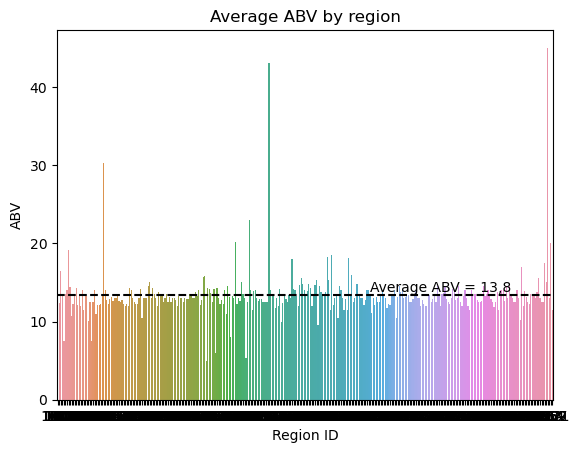

In [41]:
alcohol_mean = wines["ABV"].mean()
alcohol_mean_region = wines.groupby("RegionID")["ABV"].mean()

#print(alcohol_mean)
#print(alcohol_mean_region)

sns.barplot(x=alcohol_mean_region.index, y=alcohol_mean_region.values)
plt.axhline(y=alcohol_mean, color='black', linestyle='--')
plt.text(250, alcohol_mean+0.5, 'Average ABV = 13,8', color='black', fontsize=10, ha='center')
plt.ylabel("ABV")
plt.xlabel("Region ID")
plt.title("Average ABV by region")

### Knowing the data on ABV

In [49]:
alcohol_mean_region.describe()

count    324.000000
mean      13.394827
std        3.110250
min        5.000000
25%       12.500000
50%       13.000000
75%       13.900000
max       45.000000
Name: ABV, dtype: float64

<Axes: >

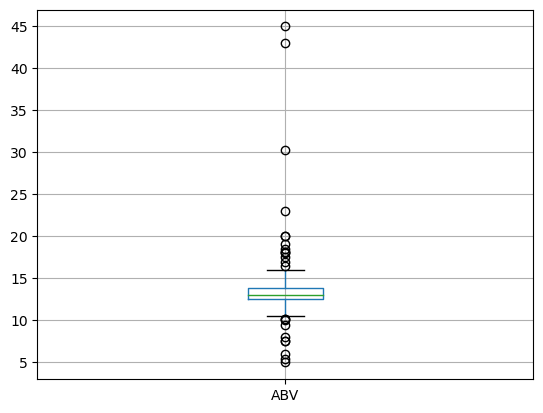

In [54]:
df  = alcohol_mean_region.to_frame()
df.boxplot()

### High and low alcohol regions

In [44]:
high_alcohol_regions = alcohol_mean_region[alcohol_mean_region > alcohol_mean]

print(high_alcohol_regions)

RegionID
1002    16.487500
1023    13.500000
1027    14.000000
1031    19.150000
1032    14.395455
          ...    
3005    15.500000
3212    17.500000
3213    15.000000
3214    45.000000
3707    20.000000
Name: ABV, Length: 123, dtype: float64


In [59]:
low_alcohol_regions = alcohol_mean_region[alcohol_mean_region < alcohol_mean]

print(low_alcohol_regions)

RegionID
1000    12.000000
1001    12.375000
1004    13.250000
1010     7.500000
1034    10.691667
          ...    
3081    13.000000
3086    12.500000
3173    12.500000
3659    13.000000
3721    11.500000
Name: ABV, Length: 201, dtype: float64


### Merging the datasets

In [61]:
wines_ratings = pd.merge(wines, ratings, on='WineID')
wines_ratings.head(2).T

,0,1
WineID,100001,100001
WineName,Espumante Moscatel,Espumante Moscatel
Type,Sparkling,Sparkling
Elaborate,Varietal/100%,Varietal/100%
Grapes,['Muscat/Moscato'],['Muscat/Moscato']
Harmonize,"['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']"
ABV,7.5,7.5
Body,Medium-bodied,Medium-bodied
Acidity,High,High
Code,BR,BR


### Average rating per user

In [63]:
rating_mean_user = wines_ratings.groupby("UserID")["Rating"].mean()
print(rating_mean_user)

UserID
1000004    3.884615
1000010    4.086957
1000021    4.058824
1000023    4.157895
1000024    3.863636
             ...   
2061042    4.076923
2061195    2.545455
2062232    4.500000
2062388    3.923077
2062618    3.821429
Name: Rating, Length: 10561, dtype: float64


In [67]:
rating_mean_user.describe()


count    10561.000000
mean         3.849067
std          0.368446
min          1.000000
25%          3.636364
50%          3.833333
75%          4.045455
max          5.000000
Name: Rating, dtype: float64

<Axes: >

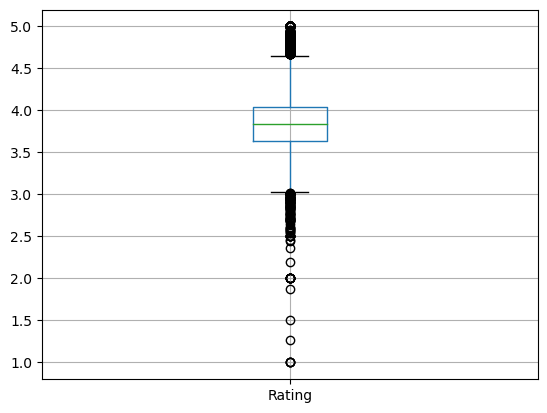

In [68]:
rating_mean_user.to_frame().boxplot()

In [72]:
# High ratings users

rating_mean_user.sort_values(ascending = False).head(10)

UserID
1979847    5.0
1902206    5.0
1164726    5.0
1920180    5.0
1026510    5.0
1213224    5.0
1422813    5.0
1061784    5.0
1903513    5.0
1037950    5.0
Name: Rating, dtype: float64

### Average rating per wine¶

In [75]:
rating_mean_wine = wines_ratings.groupby("WineID")["Rating"].mean()
rating_mean_wine.describe()

count    1007.000000
mean        3.671750
std         0.429821
min         1.500000
25%         3.384615
50%         3.666667
75%         3.941391
max         4.807692
Name: Rating, dtype: float64

In [99]:
### Top 10 best wines

top10 = rating_mean_wine.sort_values(ascending=False).head(10)

In [128]:
top10_wines = []
cont = 1

for wine_id, rating in top10.items():
    wine_name = wines_ratings[wines_ratings["WineID"] == wine_id]["WineName"].iloc[0]
    top10_wines.append([cont, wine_name, rating])
    cont += 1

top10_wines_df = pd.DataFrame(top10_wines, columns=["Ranking","WineName","Rating"])

print(top10_wines_df)


   Ranking                                  WineName    Rating
0        1                                    Solari  4.807692
1        2           Tre Soli Tre Grappa Invecchiata  4.794118
2        3                        Lauréne Pinot Noir  4.794118
3        4                                    Grange  4.758488
4        5                 Oenothèque Brut Champagne  4.757212
5        6                             IX Estate Red  4.728261
6        7                 Fortis Cabernet Sauvignon  4.722222
7        8       Pauillac (Premier Grand Cru Classé)  4.717333
8        9  Tychson Hill Vineyard Cabernet Sauvignon  4.714286
9       10                                 Red Blend  4.712500


### Filtering the dataset

In [118]:
filter = (wines_ratings["Type"] == "Red") * (wines_ratings["Grapes"].str.contains("Cabernet Sauvignon"))

wines_ratings[filter].head(2).T

,524,525
WineID,100003,100003
WineName,Cabernet Sauvignon,Cabernet Sauvignon
Type,Red,Red
Elaborate,Varietal/100%,Varietal/100%
Grapes,['Cabernet Sauvignon'],['Cabernet Sauvignon']
Harmonize,"['Beef', 'Lamb', 'Poultry']","['Beef', 'Lamb', 'Poultry']"
ABV,12.0,12.0
Body,Full-bodied,Full-bodied
Acidity,High,High
Code,BR,BR


In [122]:
#Top 10 filtered wines

wines_ratings[filter].groupby("WineID")["Rating"].mean().sort_values(ascending=False).head(10)

WineID
182711    4.807692
180330    4.728261
182169    4.722222
111415    4.717333
183379    4.714286
181280    4.712500
111395    4.687269
162497    4.655635
179043    4.633793
179855    4.630719
Name: Rating, dtype: float64

## Builing a user profile

### Changing the data type of attributes

In [164]:
grape = wines_ratings["Grapes"].str.split(",",expand=True).stack().str.replace("[","").str.replace("]","").str.strip().reset_index(level=1,drop=True).rename("Grape")
print(type(grape), grape) 

<class 'pandas.core.series.Series'> 0           'Muscat/Moscato'
1           'Muscat/Moscato'
2           'Muscat/Moscato'
3           'Muscat/Moscato'
4           'Muscat/Moscato'
                 ...        
149995          'Chardonnay'
149996    'Grüner Veltliner'
149997    'Grüner Veltliner'
149998    'Grüner Veltliner'
149999        'Syrah/Shiraz'
Name: Grape, Length: 247928, dtype: object


In [165]:
wines_join = wines_ratings.join(grape)
wines_join.head(10).T 

,0,1,2,3,4,5,6,7,8,9
WineID,100001,100001,100001,100001,100001,100001,100001,100001,100001,100001
WineName,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel,Espumante Moscatel
Type,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling,Sparkling
Elaborate,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%
Grapes,['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato'],['Muscat/Moscato']
Harmonize,"['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']"
ABV,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5
Body,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied,Medium-bodied
Acidity,High,High,High,High,High,High,High,High,High,High
Code,BR,BR,BR,BR,BR,BR,BR,BR,BR,BR


### Targeting users by grape

In [166]:
user_grape = wines_join.groupby(["UserID", "Grape"]).agg({"Rating":"mean"}) # agg applies the mean() aggregation function to the "Rating" column for each group.

user_grape.head(10)

Rating
UserID  Grape                         
1000004 'Barbera'             3.500000
        'Cabernet Franc'      3.750000
        'Cabernet Sauvignon'  3.800000
        'Chardonnay'          4.142857
        'Gamay Noir'          2.500000
        'Limnio'              3.500000
        'Macabeo'             3.500000
        'Malbec'              3.750000
        'Merlot'              3.875000
        'Muscat/Moscato'      4.000000

#### Finding the favorite grape per user

In [181]:
favorite_grape = user_grape.groupby("UserID")["Rating"].idxmax()
favorite_grape.head(10)

UserID
1000004          (1000004, 'Syrah/Shiraz')
1000010    (1000010, 'Cabernet Sauvignon')
1000021            (1000021, 'Chardonnay')
1000023            (1000023, 'Chardonnay')
1000024            (1000024, 'Chardonnay')
1000025        (1000025, 'Cabernet Franc')
1000027    (1000027, 'Cabernet Sauvignon')
1000029         (1000029, 'Pedro Ximenez')
1000031          (1000031, 'Petit Verdot')
1000036        (1000036, 'Mondeuse Noire')
Name: Rating, dtype: object

## Processo de Recomendação